# Homework 2

In this assignment you'll practice some Pandas skills on actual market data.


## Submission instructions

- **Due**: 10/8/2025 by 5:30PM CT (shared via GitHub)
- **Files**: Submit a single notebook called `hw2.ipynb` in a hw2 subfolder in
  GitHub


## 1. Groupby aggregation practice (25 pts)

Load daily history from the `history.csv` file and calculate mean and standard
deviation of log returns of `^GSPC` aggregated on the following levels (printed
out in table form is fine, no need to graph)

- By year (i.e. calculate for $1995, 1996, \dots, 2025$)
- By month of year (i.e. calculate for January, Feb, ... across all years )
- By day of week (i.e. calculate for all Mondays, all Tuesdays, etc. across all
  months and years)

Briefly comment on each of the tables.

### Notes:

- The daily return for day $t$ can be calculated as $\ln\left(S_t /
    S_{t-1}\right)$ using the closing prices (_Close_ column).
- While the returns were calculated on a daily basis, please report them in
  annualized form assuming $252$ trading days in a year.
- Each grouping should be displayed together, e.g. all years should be in one
  table (these can just be print outs of `Series` objects, with index
  corresponding to the grouping level). Better would be to display the returns
  and standard deviations for the same grouping type in the same table. To do
  this, create a `DataFrame`.
- Check out the `groupby` method of a `DataFrame` or `Series` object


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("history.csv")

df = df.loc[df["Symbol"] == "^GSPC"]
df['Date'] = pd.to_datetime(df['Date'], utc="true")

#Yearly Returns: Mean and standard deviation of daily log returns over the period of a year
yearly_returns = pd.DataFrame(index=range(2005, 2026), columns=["Mean", "Std Dev"])
for year in range(2005, 2026):
    yearly_data = df.loc[df["Date"].dt.year == year]
    returns : pd.Series = (yearly_data["Close"]/yearly_data["Open"]).apply(np.log)
    yearly_returns.loc[year] = [returns.mean()*252, returns.std()*np.sqrt(252)]

print(yearly_returns.head()) 
    

#Monthly Retunrs: Mean and standard deviation of daily log returns over the period of the same month every year   
month_names = [
  "January", "February", "March", "April", "May", "June", 
  "July", "August", "September", "October", "November", "December"
]
monthly_returns = pd.DataFrame(index=month_names, columns=["Mean", "Std Dev"])
for month in month_names:
    monthly_data = df.loc[df["Date"].dt.month_name() == month]
    returns = (monthly_data["Close"]/monthly_data["Open"]).apply(np.log)
    monthly_returns.loc[month] = [returns.mean()*252, returns.std()*np.sqrt(252)]
    
print(monthly_returns.head())


#Weekday Returns: Mean and standard deviation of weekday long returns over the period of the same weekday every year
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_returns = pd.DataFrame(index=weekday_names, columns=["Mean", "Std Dev"])
for weekday in weekday_names:
    weekly_data = df.loc[df["Date"].dt.day_name() == weekday]
    returns = (weekly_data["Close"]/weekly_data["Open"]).apply(np.log)
    weekday_returns.loc[weekday] = [returns.mean()*252, returns.std()*np.sqrt(252)]

print(weekday_returns.head())

          Mean   Std Dev
2005  0.029179   0.10279
2006  0.132114  0.100173
2007  0.039578  0.155362
2008 -0.433933  0.391125
2009  0.266839  0.253036
              Mean   Std Dev
January  -0.005385   0.15373
February  0.071266   0.15694
March     0.133607  0.201136
April     0.127556  0.169016
May       0.058261  0.137314
               Mean   Std Dev
Monday     0.002574  0.177956
Tuesday    0.088769  0.170963
Wednesday  0.071982  0.171651
Thursday   0.038262  0.176567
Friday     0.040215  0.152023


## 2. $\alpha$ and $\beta$ through time (25 pts)

In the Python beginner's course project, you calculated $\alpha$ and $\beta$ as
of a particular point in time. In this problem, you'll calculate and plot
rolling 5-year monthly $\alpha$ and $\beta$ values for the specified tickers
through time.

- Calculate these metrics for the following tickers:
  - `AAPL` (Apple Inc.)
  - `NVDA` (NVIDIA Corp.)
  - `GME` (GameStop Corp.)
  - `WMT` (Walmart Inc.)
  - `GS` (Goldman Sachs)
  - `MCD` (McDonald's Corp.)
- Use the `^GSPC` for market returns
- Resample the daily data into monthly intervals.
- Calculate the rolling 5-year $\alpha$ and $\beta$ every month (using the
  `rolling` method), starting from where enough history is available for the
  5-year lookback for each of the tickers, and plot the $\alpha$ and $\beta$
  evolution through time

Briefly comment on the two graphs.

### Notes

- You'll create two plots, one for rolling $\alpha$ and another for rolling
  $\beta$, with each plot including all tickers
- Please label axes, and include a title and legend for the two plots
- The calculated metrics should be on the y-axis and date should be on the x-axis
- The returns for each period $t$ can be calculated as $S_t / S_{t-1} - 1$ for
  this question (rather than log returns)


/var/folders/4s/pvlfk_3j4wsgp1hnvl6nhyhm0000gq/T/ipykernel_47365/3187451301.py:20: RuntimeWarning: Degrees of freedom <= 0 for slice
  beta = np.cov(array, gspc)[0,1]/np.var(gspc)
/Users/232724/Library/Python/3.13/lib/python/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/232724/Library/Python/3.13/lib/python/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/4s/pvlfk_3j4wsgp1hnvl6nhyhm0000gq/T/ipykernel_47365/3187451301.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2005-01-01', freq="1M", periods=len(beta_returns))


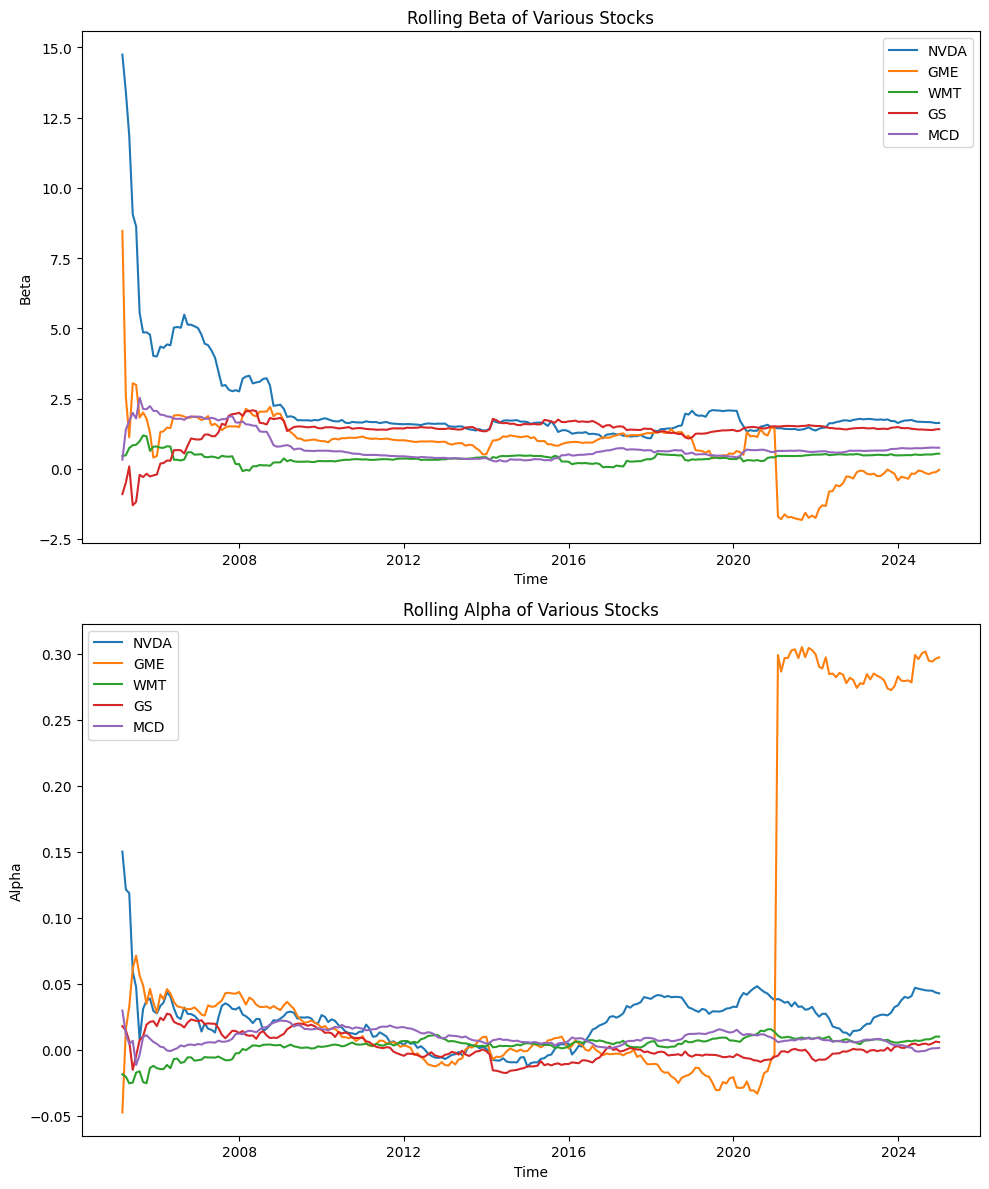

In [28]:
symbols = ["NVDA", "GME", "WMT", "GS", "MCD", "^GSPC"]
alpha = np.zeros([5, 1000])
beta = np.zeros([5, 1000])
df = pd.read_csv("history.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc="true")
returns = np.empty([6, 240])
for index, symbol in enumerate(symbols):
    symbol_data = df.loc[df["Symbol"] == symbol]
    monthly_returns = np.empty(240)
    for year in range(2005, 2025):
        for month_index, month in enumerate(month_names):
            symbol_data_for_month = symbol_data.loc[(symbol_data["Date"].dt.month_name() == month) & (symbol_data["Date"].dt.year == year)]
            monthly_return = (symbol_data_for_month.iloc[-1]["Close"]/symbol_data_for_month.iloc[0]["Open"])-1
            monthly_returns[(year-2005)*12+month_index] = monthly_return
    returns[index] = monthly_returns


#Calculating Alpha & Beta
def calculate_alpha_beta(array : np.ndarray, gspc):
    beta = np.cov(array, gspc)[0,1]/np.var(gspc)
    alpha = array.mean() - beta*(gspc.mean())
    return alpha, beta
for index in range(5): #number of symbols excluding gspc
    rolling_returns = pd.Series(returns[index]).rolling(60)
    gspc_returns = pd.Series(returns[-1]).rolling(60)
    for i, (window, market_window) in enumerate(zip(rolling_returns, gspc_returns)):
        alpha[index][i], beta[index][i]  = calculate_alpha_beta(window, market_window)

    

import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12)) 
for index, symbol in enumerate(symbols[:-1]):
    beta_returns = beta[index][beta[index]!=0]
    alpha_returns = alpha[index][alpha[index]!=0]
    dates = pd.date_range(start='2005-01-01', freq="1M", periods=len(beta_returns))
    axes[0].plot(dates,beta_returns, label=symbol)
    axes[1].plot(dates, alpha_returns, label=symbol)
    

axes[0].set_xlabel("Time")
axes[0].set_ylabel("Beta")
axes[0].set_title("Rolling Beta of Various Stocks")
axes[0].legend()

axes[1].set_xlabel("Time")
axes[1].set_ylabel("Alpha")
axes[1].set_title("Rolling Alpha of Various Stocks")
axes[1].legend()

plt.tight_layout()
plt.show()
    


    

## 3. Analysis of daily stock return series (25 pts)

Grab the daily price history of `NVDA`, then.


### a) Compute Summary Statistics

- Compute the daily log returns using the `Close` prices.
  Log returns are calculated as $\ln\left(\frac{S_{t+1}}{S_t}\right)$
- Compute the mean, standard deviation, skewness, and kurtosis
  of the daily log returns and display it.

#### Notes

- This is the same type of calculation done in question 1 just including some
  additional summary statistics
- Comment on how the metrics are scaled, i.e. are you presenting in annualized
  terms or left in daily (either is fine, just make a note)
- Make a note of whether you're using Fisher's definition or
  Person's definition of kurtosis. Refer to the documentation for the
  kurtosis method you've chosen to see which one.


In [48]:
from scipy.stats import kurtosis, skew

df = pd.read_csv("history.csv")
df["Date"] = pd.to_datetime(df["Date"], utc="true")
df = df.loc[df["Symbol"] == "NVDA"]
log_nvda_returns : pd.Series = (df["Close"]/df["Open"]).apply(np.log) #Left in daily, no annualization

mean = log_nvda_returns.mean()
stddev = log_nvda_returns.std()
skewness = skew(log_nvda_returns)
_kurtosis = kurtosis(log_nvda_returns) #Default Fisher's kurtosis

print(mean, stddev, skewness, _kurtosis)

0.00022675093069190192 0.025361685429888724 -0.07491959637928422 3.1022399976791766


### b) Plot the Daily Log Returns

- Plot the daily log returns against time

#### Notes

- The returns should be on the y-axis and time should go along the x-axis
- Include axis labels, a title, and a legend for your graph


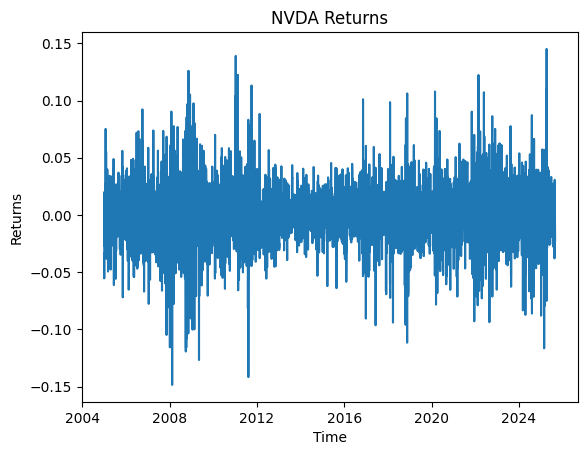

In [49]:
import matplotlib.pyplot as plt


plot = plt.plot(df["Date"].dt.date, log_nvda_returns)

plt.xlabel("Time")
plt.ylabel("Returns")
plt.title("NVDA Returns")

# Display the plot
plt.show()

### c) Plot a rolling 6-Month history of daily volatility

- This means that each period starting where enough history is available,
  calculate the standard deviation deviation using log returns starting from the
  lookback period, then increment the day by one and repeat until you reach the
  current period.

#### Notes

- Include axis labels, a title, and a legend for your graph
- Check out the `rolling` method of `DataFrame` and `Series` objects to help you with this
- Assume 252 trading days in a year


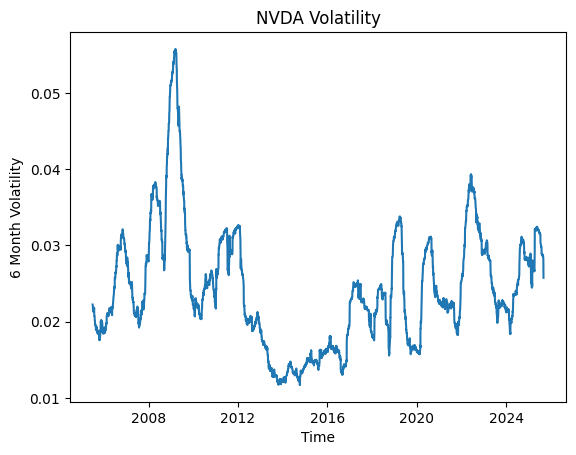

In [39]:

rolling_volatility = pd.Series(log_nvda_returns).rolling(126).std()
plt.plot(df["Date"].dt.date, rolling_volatility)
plt.title("NVDA Volatility")
plt.ylabel("6 Month Volatility")
plt.xlabel("Time")
plt.show()

## 4. Fit and simulate stock returns (25 pts)

In this section you'll fit a model to the returns in part 3 and simulate
returns. One option for a stock return model is to assume returns trend or
"drift" in some direction but also have some noise or "diffusion" such as

$\displaymode \begin{align*} d\ln(S_t) = \mu dt + \sigma dZ_t \end{align*}$

with parameters $\mu$ (drift component), $\sigma$ (diffusion component) and $Z$
a standard Brownian motion. Since $Z$ is a Brownian motion, increments in $Z$
over a period $\Delta t$ are normally distributed with mean $0$ and variance
$\Delta t$.

In discretized form,

\begin{align*} \ln\left(\frac{S_{t+\Delta t}}{S_t}\right) \approx \mu \Delta t +
\sigma \epsilon \sqrt{\Delta t} \end{align*}

with $\epsilon \sim \mathcal N(0,1)$.


### a) Simulate daily returns and summary statistics

- Use $\mu = \hat \mu$ and $\sigma = \hat \sigma$ for parameters in the model
  where $\hat \mu$ and $\hat \sigma$ are the annualized mean return and
  annualized standard deviation return calculated above for NVDA's returns
- Simulate $N=10,000$ paths over the same number of periods as Apple's returns
  (NOTE: I would use raw NumPy arrays for this part rather than storing in a
  data frame).
- Compute the mean, standard deviation, skewness and kurtosis of the simulated
  returns. Make sure you're using the same kurtosis formulation as in part 3.
- Compare the summary statistics for the simulated returns to the summary
  statistics for the actual returns in part **3a**.

#### Notes

- Assume 252 trading days in a year


In [55]:
from scipy.stats import norm
mean = log_nvda_returns.mean() #not annualizing because returns were already in daily format
std = log_nvda_returns.std()
simulated_returns = mean+std*np.random.normal(size=[10_000, len(log_nvda_returns)]) #10,000 paths each with same length as a return array

flat = simulated_returns.flatten()
mean = simulated_returns.flatten().mean()
std = simulated_returns.flatten().std()
skewness = skew(simulated_returns.flatten())
_kurtosis = kurtosis(flat)
print(mean, std, skewness, _kurtosis)

"""I notice that the mean and standard deviation are similar, but the skewness and kurtosis are much smaller.
I assume this is because limiting the deviation from the mean to one standard deviation prevents the fatter 
tails required for high kurtosis. I also assume the small skewness is because of the high amounts of random data
forming equal proprotions over time."""

0.00023062083466493145 0.025360893323791513 -1.7754258863866621e-06 0.0006438509945643212


### b) Plot the simulated daily log returns

- Choose a sample path from the simulated log returns, and overlay it on top of the
  plot you created in part **3 b)**, using a different color or line style so you
  can see the differences
- Make sure your legend is updated with the new plot as well
- What do you notice is different between the two lines?


Text(0.5, 1.0, 'NVDA Returns')

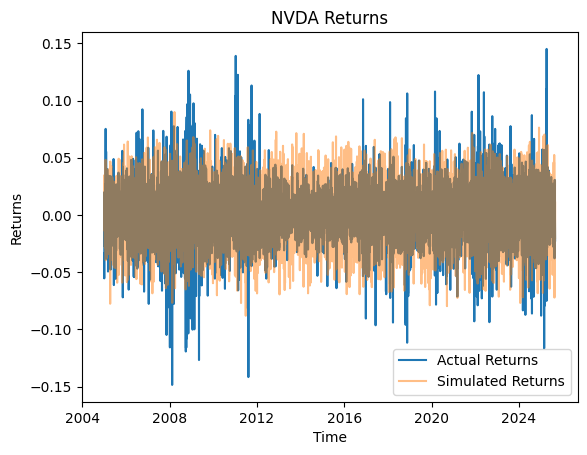

In [58]:
plt.plot(df["Date"].dt.date, log_nvda_returns, label="Actual Returns")
plt.plot(df["Date"].dt.date, simulated_returns[0], alpha=0.5, label="Simulated Returns")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Returns")
plt.title("NVDA Returns")

#Simulated returns tend to have a lower peak frequency of high/low returns but a higher frequency of moderate returns

### c) Plot a rolling 6-month history of simulated daily volatility

- Using the same sample path from **a**, overlay the rolling 6-month simulated lookback volatility
  on top of the graph created from part **3c**
- Make sure your legend is updated with the new plot as well
- What do you notice is different between the two lines?


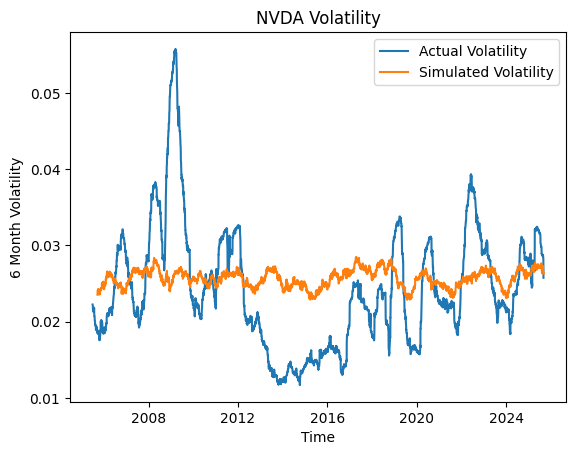

In [61]:
plt.plot(df["Date"].dt.date, rolling_volatility, label="Actual Volatility")
plt.plot(df["Date"].dt.date, pd.Series(simulated_returns[0]).rolling(180).std(), label="Simulated Volatility")
plt.title("NVDA Volatility")
plt.ylabel("6 Month Volatility")
plt.xlabel("Time")
plt.legend()
plt.show()

#Simulated Returns have a much lower variance in the rolling volatility of returns

### d) Calculate the following risk metrics for actual and simulated returns

**(i)** VaR(95) and VaR(99)

- VaR(x) stands for Value at Risk and is the return level such that x% of
  returns are greater than that level.

**(ii)** CTE(95) and CTE(99)

- CTE(x) stands for conditional tail expectation and represents the average
  of the values below VaR(x). For example, CTE(95) in this case represents
  the average 5% _worst_ returns

**(iii)** How many of Apple's returns over the entire history are 6 standard
deviations below the mean? How many of the simulated returns are 6 standard
deviations below the mean?


In [64]:
from scipy.stats import percentileofscore
var_95_x_simulated = np.percentile(simulated_returns[0], 5)
var_95_x_actual = np.percentile(log_nvda_returns, 5)

cte_95_x_simulated = simulated_returns[0][simulated_returns[0]<var_95_x_simulated].mean()
cte_95_x_actual = log_nvda_returns[log_nvda_returns<var_95_x_actual].mean()

low_outliers_simulated = 0 #Returns maximized to 1 standard deviation
low_outliers_actual = percentileofscore(log_nvda_returns, log_nvda_returns.mean()-6*log_nvda_returns.std())*len(log_nvda_returns)

print(var_95_x_actual, var_95_x_simulated, cte_95_x_actual, cte_95_x_simulated, low_outliers_actual, low_outliers_simulated)

-0.04056036375651999 -0.04139368769605701 -0.058925814484072414 -0.05300323189805232 0.0 0


### e) Evaluate the model

Comment using the results from above

- What features of Apple's return series does the model capture?
- What features of Apple's return series does the model fail to capture?
- What issues (if any) would there be if a portfolio manager was using this
  model to understand their downside risk exposure? I.e. the probability and
  size of what he/she could lose over a short period of time


The simulated returns captured the mean and many other high level features such as standard deviation, value at risk, and even conditional tail expectation to an extent. However, it failed to capture many statistics that were dependent on extreme cases and/or factors outside of traditional randomness. For example, skewness was left skewed in the actual returns because of occasional days that are significantly negative but neutral in the simulated returns. The variance of rolling volatility over time was also much lower in the simulated returns, meaning the actual returns were subject to occasional periods of high volatility that were not modeled with this algorithm. In addition, kurtosis was much lower in the simulated returns because the returns were more spread out instead of having a high rate of normal/extreme returns. For a portfolio manager, they must understand that using this model must understand that it does not simulate short periods of volatility as well as it should, and that their short term losses could be much greater than the model predicts. At the same time however, losses in the modeled returns are more frequent, albeit less extreme.